In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import yfinance
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
df =  yfinance.download("ABB.BO", start ="2017-09-01",end = "2020-09-01")
df1 = yfinance.download("^BSESN", start ="2017-09-01",end = "2020-09-01")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
ls = df1.index.to_list()
df = df.loc[ls]

In [4]:
ret_stock = df
ret_stock = df['Adj Close'].pct_change()[1:]
ret_sensex = df1
ret_sensex = df1['Adj Close'].pct_change()[1:]
len(ret_sensex)

734

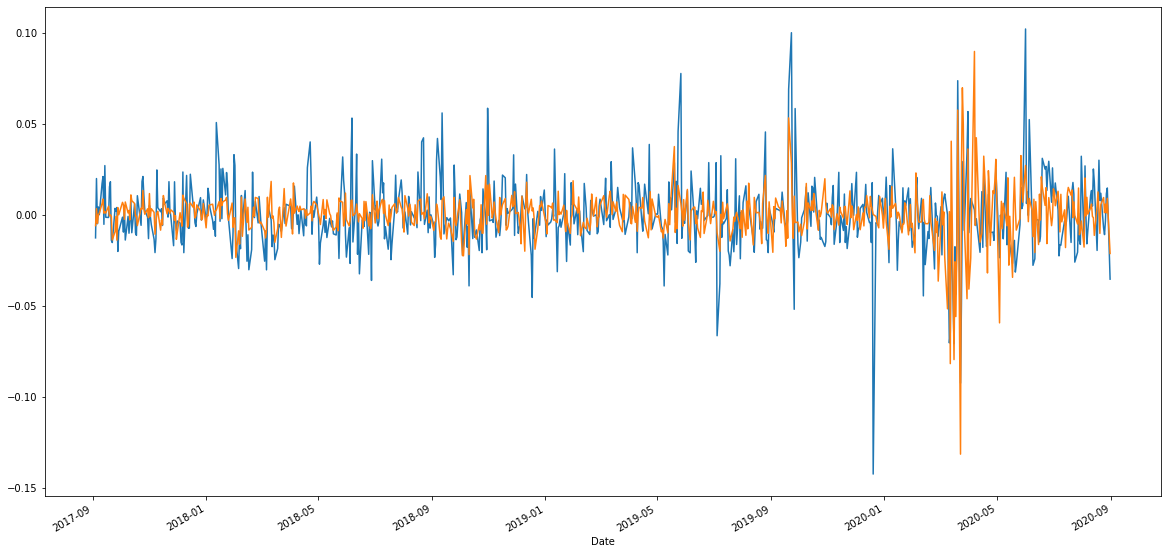

In [5]:
plt.figure(figsize=(20,10))
ret_stock.plot()
ret_sensex.plot()
plt.show()

In [6]:
returns = yfinance.download("ABB.BO", start="2017-09-01",end = "2020-09-01")
ls = df1.index.to_list()
returns = returns.loc[ls]
ret_stock = returns['Adj Close'].pct_change()[1:]
# print(len(ret_stock))
ret_stock

[*********************100%***********************]  1 of 1 completed


Date
2017-09-04   -0.012683
2017-09-05    0.019916
2017-09-06   -0.004919
2017-09-07    0.004307
2017-09-08    0.000037
                ...   
2020-08-25   -0.010888
2020-08-26   -0.003115
2020-08-27    0.011563
2020-08-28    0.014726
2020-08-31   -0.035368
Name: Adj Close, Length: 734, dtype: float64

In [7]:
monthly_returns = df['Adj Close'].resample('M').ffill().pct_change()[1:]
# monthly_returns
close_val = monthly_returns.to_list()
monthly_returns = monthly_returns + 1
def compute_returns(prices, Date, tenure):
    returns = 1
    for i in range(1,tenure + 1): # 6 Stands for 6 month return
        returns = returns*prices.shift(i)
    return returns - 1
da = compute_returns(monthly_returns,1,6)
# da = da.asfreq('6M', method='ffill')
lst = da.asfreq('6M', method='ffill').index.to_list()

In [9]:
companies = pd.read_csv("companies.csv")
returns = yfinance.download('ABB.BO', start="2017-09-01",end = "2020-09-01")
#         ls = returns.index.to_list()
returns = returns.loc[ls]
ret_stock = returns['Adj Close'].pct_change()[1:]
betas = []
for i in range(len(lst)-1):
    (beta, alpha) = stats.linregress(ret_sensex.loc[lst[i]:lst[i+1]].values, ret_stock.loc[lst[i]:lst[i+1]].values)[0:2] 
    betas.append(beta)
betas

[*********************100%***********************]  1 of 1 completed


[0.8694888732976038,
 0.9260874717689931,
 0.30947188725953784,
 1.1142179408349537,
 0.46739061680369326]

In [21]:
i = 0
comp = []
lis_comp = []
lis_sym = []
new_comp = []
import time
st = time.time()
for data in companies.itertuples():
    try:
        betas = []
        ret = 1
        returns = yfinance.download(data.Symbol, start="2017-09-01",end = "2020-09-01")
#         ls = returns.index.to_list()
        returns = returns.loc[ls]
        ret_stock = returns['Adj Close'].pct_change()[1:]
        print(len(ret_stock)," ",len(ret_sensex))
        if len(ret_stock) == len(ret_sensex):
            for i in range(len(lst)-1):
                (beta, alpha) = stats.linregress(ret_sensex.loc[lst[i]:lst[i+1]].values, ret_stock.loc[lst[i]:lst[i+1]].values)[0:2] 
                betas.append(beta)
            i += 1
            comp.append(betas)
            lis_comp.append(data._2)
            lis_sym.append(data.Symbol)
        else:
            new_comp.append(data.Symbol)
            print("Data not available till required date for, ", data.Symbol)
    except:
        print("Issue extracting data of ", data.Symbol)
    
    if i>10:
#         break
        print(i)
        
print("Time taken: ", time.time() - st)

[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- UTIQUE.BO: No data found for this date range, symbol may be delisted
Issue extracting data of  UTIQUE.BO
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*************

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- WELSPLSOL.BO: No data found for this date range, symbol may be delisted
Issue extracting data of  WELSPLSOL.BO
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*******

[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- PRISMX.BO: No data found for this date range, symbol may be delisted
Issue extracting data of  PRISMX.BO
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*************

[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  

[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  

[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- NORTHPR.BO: No data found for this date 

[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  

[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- TEATIME.BO: No data found for this date range, symbol may be delisted
Issue extracting data of  TEATIME.BO
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- INERTIAST.BO: No data found for this date range, symbol may be delisted
Issue extracting data of  INERTIAST.BO
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  PHTRADING.BO
[*********************100%***********************]  1 of 1 completed
734   734
[*****************

[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  

[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  RGRL.BO
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%**

[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  PURITY.BO
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- MICROSE.BO: No data found, symbol may be delisted
Issue extracting data of  MICROSE.BO
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*****

[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  

[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  

[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- MENAMANI.BO: No data found for this date range, symbol may be delisted
Issue extracting data of  MENAMANI.BO
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- PRAVEG.BO: No data found for this date range, symbol may be delisted
Issue extracting data of  PRAVEG.BO
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- RR

[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  

[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  

[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  

[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  

[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CDG.BO: No data found for this date range, symbol may be delisted
Issue extracting data of  CDG.BO
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
735   734
Data not available till required date for,  INFRATEL.BO
[*********************100%*****************

[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  2 of 2 completed

2 Failed downloads:
- BUDGE: No data found, symbol may be delisted
- BUDGE.BO: No data found, symbol may be delisted
Issue extracting data of  BUDGE BUDGE.BO
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- D3YRCEERG.BO: No data found, symbol may be delist

[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- SWAGTAM.BO: No data found for this date range, symbol may be delisted
Issue extracting data of  SWAGTAM.BO
[*********************100%***********************]  1 of 1 completed
734   734
[***********

[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AMS.BO: No data found, symbol may be delisted
Issue extracting data of  AMS.BO
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%**************

[*********************100%***********************]  1 of 1 completed
Issue extracting data of  IPRU9193.BO
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- IPRU9194.BO: No data found, symbol may be delisted
Issue extracting data of  IPRU9194.BO
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  APEX.BO
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  SHISHIND.BO
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  ANG.BO
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  DWL.BO
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- KCDGROUP.BO: No data found for this date range, sy

[*********************100%***********************]  1 of 1 completed
Issue extracting data of  SBRANDS.BO
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  SHARIKA.BO
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  ICICIB22.BO
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  ASPIRA.BO
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  DNAMEDIA.BO
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  HHOF1140DG.BO
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  HHOF1140DD.BO
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  HHOF1140RG.BO
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  HHOF1140RD.BO
[*********************100%*******

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ANGEL.BO: No data found for this date range, symbol may be delisted
Issue extracting data of  ANGEL.BO
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- HGINFRA.BO: No data found for this date range, symbol may be delisted
Issue extracting data of  HGINFRA.BO
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- EIS.BO: No data found for this date range, symbol may be delisted
Issue extracting data of  EIS.BO
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AXISCBD1D.BO: No data found, symbol may be delisted
Issue extracting data of  AXISCBD1D.BO
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  AXISCBDGG.BO
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  AXISCBDPD.BO
[*******************

[*********************100%***********************]  1 of 1 completed
Issue extracting data of  IPRU9297.BO
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  IPRU9298.BO
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  ICICI500.BO
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- INDOSTAR.BO: No data found for this date range, symbol may be delisted
Issue extracting data of  INDOSTAR.BO
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- MILEFUR.BO: No data found for this date range, symbol may be delisted
Issue extracting data of  MILEFUR.BO
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- UHZAVERI.BO: No data found for this date range, symbol may be delisted
Issue extracting data of  UHZAVERI.BO
[*********************100%***********************]  1 of 1 completed
Issue extrac

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- IDFCEOS6DG.BO: No data found for this date range, symbol may be delisted
Issue extracting data of  IDFCEOS6DG.BO
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- IDFCEOS6DD.BO: No data found for this date range, symbol may be delisted
Issue extracting data of  IDFCEOS6DD.BO
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- HDFCAMC.BO: No data found for this date range, symbol may be delisted
Issue extracting data of  HDFCAMC.BO
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- VIVANTA.BO: No data found for this date range, symbol may be delisted
Issue extracting data of  VIVANTA.BO
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- TINNATFL.BO: No data found for this date range, symbol may be delisted
Issue extracting data of  TINNATFL

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- VIVIDM.BO: No data found for this date range, symbol may be delisted
Issue extracting data of  VIVIDM.BO
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BCPL.BO: No data found for this date range, symbol may be delisted
Issue extracting data of  BCPL.BO
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ADANIGAS.BO: No data found for this date range, symbol may be delisted
Issue extracting data of  ADANIGAS.BO
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- NETRIPPLES.BO: No data found for this date range, symbol may be delisted
Issue extracting data of  NETRIPPLES.BO
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- PHOSPHATE.BO: No data found for this date range, symbol may be delisted
Issue extracting data of  PHOSPHATE.BO
[*****

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AFFLE.BO: No data found for this date range, symbol may be delisted
Issue extracting data of  AFFLE.BO
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- SEACOAST.BO: No data found for this date range, symbol may be delisted
Issue extracting data of  SEACOAST.BO
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ICICIBANKP.BO: No data found for this date range, symbol may be delisted
Issue extracting data of  ICICIBANKP.BO
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- SPANDANA.BO: No data found for this date range, symbol may be delisted
Issue extracting data of  SPANDANA.BO
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- SWSOLAR.BO: No data found for this date range, symbol may be delisted
Issue extracting data of  SWSOLAR.BO
[***

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 08DPD.BO: No data found, symbol may be delisted
Issue extracting data of  08DPD.BO
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 08AQR.BO: No data found, symbol may be delisted
Issue extracting data of  08AQR.BO
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 08DPR.BO: No data found, symbol may be delisted
Issue extracting data of  08DPR.BO
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 08ADD.BO: No data found, symbol may be delisted
Issue extracting data of  08ADD.BO
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ROJL.BO: No data found for this date range, symbol may be delisted
Issue extracting data of  ROJL.BO
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- COSPOWER.BO: No data 

[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  SBILIFE.NS
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  SBICARD.NS
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
Issue ex

[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
735   734
Data not available till required date for,  SRTRANSFIN.NS
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734 

[*********************100%***********************]  1 of 1 completed
Issue extracting data of  FLUOROCHEM.NS
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************

[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  LEMONTREE.NS
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  VARROC.NS
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  MAXINDIA.NS
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%**********************

[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
735   734
Data not available till required date for,  IMPAL.NS
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734

[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  5PAISA.NS
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  ASALCBR.NS
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  BRNL.NS
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 

[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  SILVERTUC.NS
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  ASTRON.NS
[*********************100%***********************]  1 of 1 completed
734   7

[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- SHIVAUM.NS: No data found, symbol may be delisted
Issue extracting data of  SHIVAUM.NS
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  SVLL.NS
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  MAHICKRA.NS
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  SAKETH.NS
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- WFL.NS: No data found

[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- HPIL.NS: No data found, symbol may be delisted
Issue extracting data of  HPIL.NS
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  VERA.NS
[*********************100%***********************]  1 of 1 completed
735   734
Data not available till required date for,  VAISHALI.NS
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  UNIVASTU.NS
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[********

[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  NILASPACES.NS
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  E2E.NS
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  KSHITIJPOL.NS
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  BRIGHT.NS
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  PAR.NS
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  AVSL.NS
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 

[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  PERFECT.NS
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  LAXMICOT.NS
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  MARSHALL.NS
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- VCL.NS: No data found, symbol may be delisted
Issue extracting data of  VCL.NS
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%**********

[*********************100%***********************]  1 of 1 completed
Issue extracting data of  JALAN.NS
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- NIRAJISPAT.NS: No data found for this date range, symbol may be delisted
Issue extracting data of  NIRAJISPAT.NS
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  HUSYSLTD.NS
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
734   734
[*********************100%***********************]  1 of 1 completed
Issue extracting data of  FELIX.NS
[******

In [80]:
dta = pd.DataFrame(np.array(comp).T, columns=lis_sym, index=pd.Index(lst[1:]))
dta.to_csv('beta_dat.csv', index=True)
dta

,ABB.BO,AEGISLOG.BO,AMARAJABAT.BO,AMBALALSA.BO,HDFC.BO,ANDHRAPET.BO,ANSALAPI.BO,ARUNAHTEL.BO,BOMDYEING.BO,ASIANHOTNR.BO,...,EUROMULTI.NS,JAINSTUDIO.NS,DCMFINSERV.NS,JAIHINDPRO.NS,BLUECHIP.NS,SABEVENTS.NS,ATNINTER.NS,ORCHIDPHAR.NS,SHARONBIO.NS,TANTIACONS.NS
2018-04-30,0.869489,0.834085,0.843174,0.597251,1.313998,1.534559,1.218512,1.342136,1.179228,1.901163,...,0.045509,-0.244313,0.316113,-0.333688,1.235274,0.026139,0.000000,0.304638,0.722351,0.229234
2018-10-31,0.926087,0.868492,0.861927,0.542214,1.258209,1.330729,1.377011,0.089030,1.932821,0.905170,...,-0.125621,-0.566411,-0.191111,-0.097366,-1.497441,-0.261840,1.393108,0.748252,0.763656,0.773297
2019-04-30,0.309472,0.625345,0.722994,1.267118,1.268660,1.559131,1.467540,0.297800,1.679416,0.330283,...,0.335590,0.096935,0.062767,-0.374043,-0.185624,-0.439382,-0.312538,0.821315,-0.052366,0.323955
2019-10-31,1.114218,0.529224,1.052483,0.440754,1.127428,1.172590,0.662143,-0.330143,1.946699,0.620084,...,-0.161070,-0.141132,0.086952,0.307169,-0.012477,-0.154821,1.762238,0.289492,0.000000,-0.047384
2020-04-30,0.467391,0.795118,0.877581,0.347684,1.149962,0.371625,0.375491,0.086116,1.005233,0.317698,...,0.396222,0.274485,0.396539,0.074272,0.568397,-0.062127,-0.855414,0.000000,0.000000,-0.010380


In [86]:
dtaa = pd.read_csv('price_dat.csv')
dtaa = dtaa.set_index('Date')
dtaa.index = pd.to_datetime(dtaa.index)
dtaa.index = dtaa.index.strftime('%d-%m-%Y')
common_cols = list(set(dtaa.columns).intersection(dta.columns))
dtaa = dtaa[common_cols]
dtaa.to_csv("return_data.csv", index=True)


Index(['30-09-2017', '31-10-2017', '30-11-2017', '31-12-2017', '31-01-2018',
       '28-02-2018', '31-03-2018', '30-04-2018', '31-05-2018', '30-06-2018',
       '31-07-2018', '31-08-2018', '30-09-2018', '31-10-2018', '30-11-2018',
       '31-12-2018', '31-01-2019', '28-02-2019', '31-03-2019', '30-04-2019',
       '31-05-2019', '30-06-2019', '31-07-2019', '31-08-2019', '30-09-2019',
       '31-10-2019', '30-11-2019', '31-12-2019', '31-01-2020', '29-02-2020',
       '31-03-2020', '30-04-2020', '31-05-2020', '30-06-2020', '31-07-2020',
       '31-08-2020'],
      dtype='object', name='Date')

In [84]:
dtaaa = dta[common_cols]
dtaaa.index.name = "Date"
dtaaa.index = pd.to_datetime(dtaaa.index, yearfirst=False)#.strftime('%Y-%m-%d')
dtaaa.index = dtaaa.index.strftime('%d-%m-%Y')
# date = beta.index.to_list()
dtaaa.to_csv("beta_dat.csv", index=True)
dtaaa

,INSECTICID.NS,UNITINT.BO,PICTUREHS.BO,LOYAL.BO,WHBRADY.BO,MADHURIND.BO,HCLTECH.BO,SIS.NS,ABFRL.NS,KEMISTAR.BO,...,MAHABANK.BO,KOKUYOCMLN.NS,ASHARI.BO,RAMSARUP.NS,TRIVENI.NS,RFSL.BO,HARITASEAT.NS,KOCL.BO,INDIANCARD.BO,AMALGAM.BO
Date,,,,,,,,,,,,,,,,,,,,,
30-04-2018,0.902741,0.071391,1.778852,0.214590,0.689512,0.199051,0.309424,0.532734,0.700224,0.038494,...,0.821310,1.128612,0.218505,0.487937,1.283244,0.000000,0.427019,-0.120918,0.410032,0.000000
31-10-2018,0.937072,0.026816,-0.216107,0.978146,0.166898,-0.055473,0.526971,0.725880,0.753087,0.387552,...,0.705483,1.474017,-0.740013,-1.059253,0.952664,-0.024847,0.984759,-0.007795,0.189744,0.000000
30-04-2019,1.108067,0.333965,-0.370362,1.058083,1.234735,0.077145,0.762071,0.933727,0.291813,0.109595,...,1.476314,0.814835,-0.038318,-0.845151,0.618287,-0.297177,0.949244,-0.008688,0.412814,0.000000
31-10-2019,0.811245,0.064998,-0.145475,-0.435958,0.551385,-0.019424,0.141549,0.233284,1.030426,0.562451,...,0.984617,1.127808,-0.319796,-0.871002,0.812051,-0.135572,0.838896,0.189368,0.493399,0.000000
30-04-2020,1.112857,0.030925,-0.025898,0.125513,0.191491,0.031371,0.780594,0.702292,0.710685,0.829522,...,0.260348,1.001032,-0.037541,0.756095,0.547621,-0.012571,0.620988,-0.014927,0.119846,0.029213
